In [1]:
# Build a prediction model for Churn_out_rate 

sh.cr <- read.csv(file.choose()) # choose the Emp_Data.csv data set

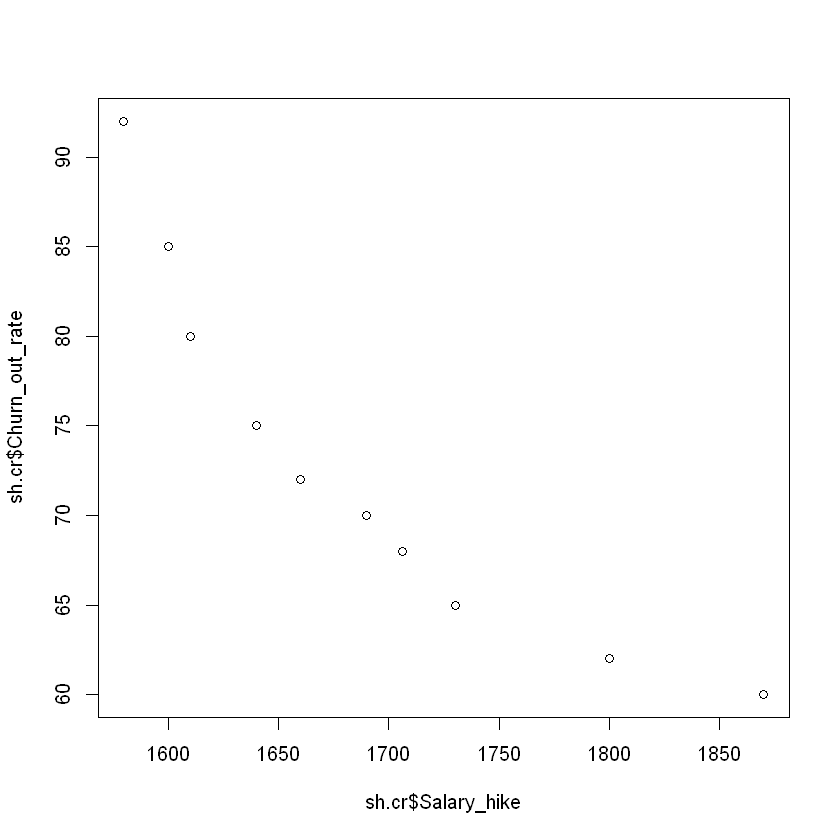

In [2]:
# 10 Observations of 2 variables

# Scatter Diagram (Plot x,y)
plot(sh.cr$Salary_hike,sh.cr$Churn_out_rate)

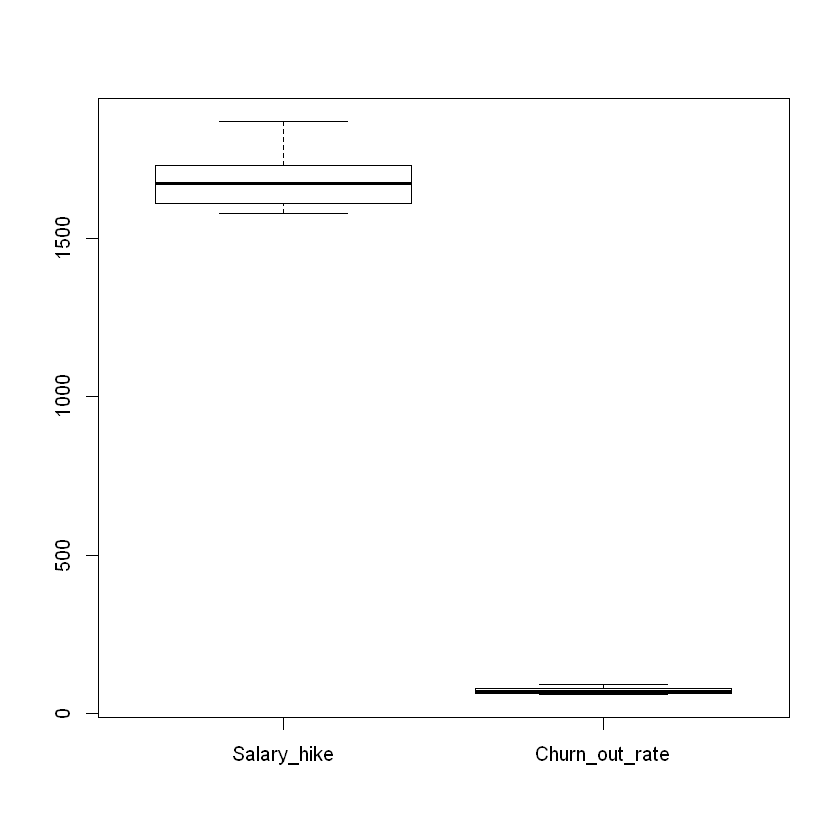

In [3]:
# Other Exploratory data analysis and Plots

boxplot(sh.cr)

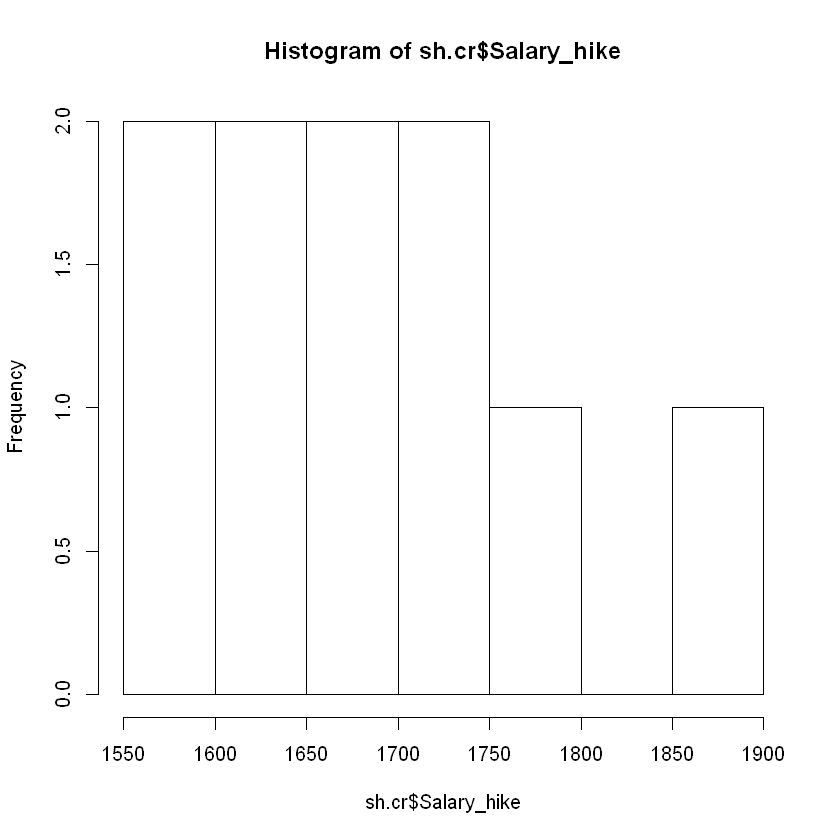

In [4]:
hist(sh.cr$Salary_hike)

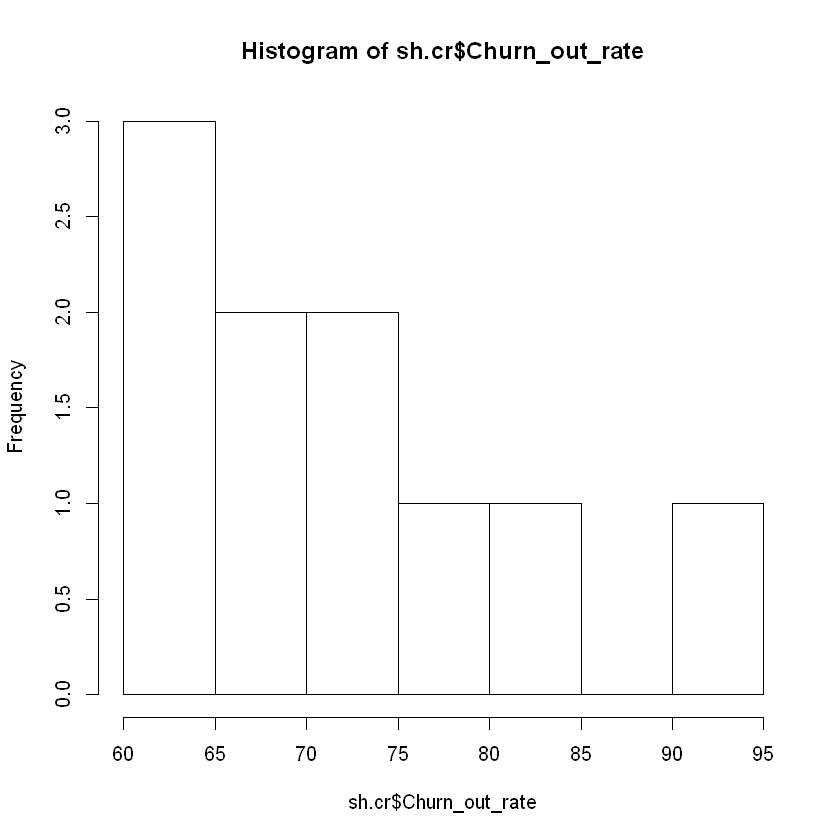

In [5]:
hist(sh.cr$Churn_out_rate)

In [6]:
summary(sh.cr)

  Salary_hike   Churn_out_rate 
 Min.   :1580   Min.   :60.00  
 1st Qu.:1618   1st Qu.:65.75  
 Median :1675   Median :71.00  
 Mean   :1689   Mean   :72.90  
 3rd Qu.:1724   3rd Qu.:78.75  
 Max.   :1870   Max.   :92.00  

In [7]:
# Correlation coefficient value for Salary Hike and Churn_out_Date
cr<- sh.cr$Churn_out_rate
sh <- sh.cr$Salary_hike
cor(cr,sh)

[1] -0.9117216

In [8]:
# If |r| is greater than  0.85 then Co-relation is Strong(Correlation Co-efficient = -0.9117216). 
# This has a strong negative Correlation 

# Simple model without using any transformation
reg<-lm(cr~sh)
summary(reg)



Call:
lm(formula = cr ~ sh)

Residuals:
   Min     1Q Median     3Q    Max 
-3.804 -3.059 -1.819  2.430  8.072 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 244.36491   27.35194   8.934 1.96e-05 ***
sh           -0.10154    0.01618  -6.277 0.000239 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.469 on 8 degrees of freedom
Multiple R-squared:  0.8312,	Adjusted R-squared:  0.8101 
F-statistic:  39.4 on 1 and 8 DF,  p-value: 0.0002386


In [9]:
# Probability value should be less than 0.05(1.96e-05)
# The multiple-R-Squared Value is 0.8312 which is greater than 0.8(In General)
# Adjusted R-Squared Value is 0.8101 
# The Probability Value for F-Statistic is 0.0002386(Overall Probability Model is also less than 0.05)
confint(reg,level = 0.95) # confidence interval

,2.5 %,97.5 %
(Intercept),181.2912317,307.4385905
sh,-0.1388454,-0.0642399


In [10]:
# The above code will get you 2 equations 
# 1 to caliculate the lower range and other for upper range

# Function to Predict the above model 
predict(reg,interval="predict")

Warning message in predict.lm(reg, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
83.92753,72.38391,95.47115
81.89668,70.59327,93.20009
80.88125,69.68123,92.08127
77.83497,66.87456,88.79538
75.80412,64.94216,86.66607
72.75784,61.94828,83.56740
71.13316,60.30425,81.96206
68.69613,57.77694,79.61533
61.58815,50.00746,73.16884
54.48016,41.72742,67.23290


In [11]:
# predict(reg,type="prediction")
# Adjusted R-squared value for the above model is 0.8101 

# we may have to do transformation of variables for better R-squared value
# Applying transformations

# Logarthmic transformation
reg_log<-lm(cr~log(sh))  # Regression using logarthmic transformation
summary(reg_log)


Call:
lm(formula = cr ~ log(sh))

Residuals:
   Min     1Q Median     3Q    Max 
-3.678 -2.851 -1.794  2.275  7.624 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1381.5      195.4   7.070 0.000105 ***
log(sh)       -176.1       26.3  -6.697 0.000153 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.233 on 8 degrees of freedom
Multiple R-squared:  0.8486,	Adjusted R-squared:  0.8297 
F-statistic: 44.85 on 1 and 8 DF,  p-value: 0.0001532


In [12]:
confint(reg_log,level=0.95)

,2.5 %,97.5 %
(Intercept),930.8584,1832.0540
log(sh),-236.7512,-115.4682


In [13]:
predict(reg_log,interval="predict")

Warning message in predict.lm(reg_log, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
84.37627,73.40258,95.34996
82.16102,71.43838,92.88366
81.06376,70.44736,91.68017
77.81241,67.43614,88.18869
75.67773,65.39568,85.95978
72.52344,62.28515,82.76172
70.86397,60.60253,81.12541
68.40372,58.04985,78.75760
61.41829,50.44392,72.39265
54.69939,42.69592,66.70286


In [14]:
# Multiple R-squared value for the above model is 0.8486
# Adjusted R-squared:  0.8297 

# we may have to do different transformation for a better R-squared value
# Applying different transformations

# Exponential model 
reg_exp<-lm(log(cr)~sh) # regression using Exponential model
summary(reg_exp)


Call:
lm(formula = log(cr) ~ sh)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04825 -0.03519 -0.01909  0.02942  0.08970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.6383000  0.3175983  20.902 2.88e-08 ***
sh          -0.0013963  0.0001878  -7.434 7.38e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0519 on 8 degrees of freedom
Multiple R-squared:  0.8735,	Adjusted R-squared:  0.8577 
F-statistic: 55.26 on 1 and 8 DF,  p-value: 7.377e-05


In [15]:
confint(reg_exp,level=0.95)

,2.5 %,97.5 %
(Intercept),5.905917079,7.3706828388
sh,-0.001829477,-0.0009631923


In [16]:
exp(predict(reg_exp,interval="predict"))

Warning message in predict.lm(reg_exp, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
84.10710,73.55634,96.17122
81.79076,71.73037,93.26215
80.65662,70.82070,91.85860
77.34770,68.10452,87.84537
75.21752,66.30465,85.32848
72.13174,63.62321,81.77813
70.53808,62.20357,79.98932
68.21338,60.09051,77.43427
61.86146,54.07801,70.76517
56.10101,48.37944,65.05499


In [17]:
# Multiple R-squared value - 0.8735
# Adjusted R SQuare Value - 0.8577 
# Higher the R-sqaured value - Better chances of getting good model 
# for Delivery Time and Sorting Time

# Quadratic model
sh.cr[,"sh_sq"] = sh*sh

# Quadratic model
quad_mod <- lm(cr~sh+I(sh^2),data=sh.cr)
summary(quad_mod)


Call:
lm(formula = cr ~ sh + I(sh^2), data = sh.cr)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5523 -1.3280  0.3497  0.9029  2.8296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.647e+03  2.281e+02   7.222 0.000174 ***
sh          -1.737e+00  2.657e-01  -6.538 0.000322 ***
I(sh^2)      4.754e-04  7.720e-05   6.158 0.000464 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.886 on 7 degrees of freedom
Multiple R-squared:  0.9737,	Adjusted R-squared:  0.9662 
F-statistic: 129.6 on 2 and 7 DF,  p-value: 2.949e-06


In [18]:
confint(quad_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),1.107738e+03,2.186285e+03
sh,-2.365306e+00,-1.108872e+00
I(sh^2),2.928508e-04,6.579259e-04


In [19]:
predict(quad_mod,interval="predict")

Warning message in predict.lm(quad_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
89.17035,83.78480,94.55590
84.66327,79.65803,89.66851
82.55234,77.66358,87.44111
76.79003,72.03031,81.54976
73.42388,68.63567,78.21210
69.08774,64.20255,73.97292
67.12501,62.19286,72.05716
64.63730,59.66195,69.61265
60.50952,55.48124,65.53780
61.04055,54.97443,67.10667


In [20]:
# Adjusted R-Squared = 0.9662
#Multiple R -Squared Value = 0.9737

# Quadratic model
qd_model <- lm(cr~sh+sh_sq,data=sh.cr)
summary(qd_model)


Call:
lm(formula = cr ~ sh + sh_sq, data = sh.cr)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5523 -1.3280  0.3497  0.9029  2.8296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.647e+03  2.281e+02   7.222 0.000174 ***
sh          -1.737e+00  2.657e-01  -6.538 0.000322 ***
sh_sq        4.754e-04  7.720e-05   6.158 0.000464 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.886 on 7 degrees of freedom
Multiple R-squared:  0.9737,	Adjusted R-squared:  0.9662 
F-statistic: 129.6 on 2 and 7 DF,  p-value: 2.949e-06


In [21]:
confint(quad_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),1.107738e+03,2.186285e+03
sh,-2.365306e+00,-1.108872e+00
I(sh^2),2.928508e-04,6.579259e-04


In [22]:
predict(quad_mod,interval="predict")

Warning message in predict.lm(quad_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
89.17035,83.78480,94.55590
84.66327,79.65803,89.66851
82.55234,77.66358,87.44111
76.79003,72.03031,81.54976
73.42388,68.63567,78.21210
69.08774,64.20255,73.97292
67.12501,62.19286,72.05716
64.63730,59.66195,69.61265
60.50952,55.48124,65.53780
61.04055,54.97443,67.10667


In [23]:
# Adjusted R-Squared = 0.9662 
#Multiple R -Squared Value = 0.9737

# Cubic model
poly_mod <- lm(cr~sh+I(sh^2)+I(sh^3),data=sh.cr)
summary(poly_mod) # 0.9893


Call:
lm(formula = cr ~ sh + I(sh^2) + I(sh^3), data = sh.cr)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06811 -0.49848  0.04253  0.76434  1.49050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.320e+04  3.900e+03   3.384   0.0148 *
sh          -2.194e+01  6.817e+00  -3.218   0.0182 *
I(sh^2)      1.223e-02  3.966e-03   3.084   0.0216 *
I(sh^3)     -2.276e-06  7.679e-07  -2.964   0.0251 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.298 on 6 degrees of freedom
Multiple R-squared:  0.9893,	Adjusted R-squared:  0.984 
F-statistic: 185.4 on 3 and 6 DF,  p-value: 2.647e-06


In [24]:
confint(poly_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),3.654531e+03,2.273912e+04
sh,-3.861930e+01,-5.255724e+00
I(sh^2),2.525628e-03,2.193585e-02
I(sh^3),-4.154996e-06,-3.971350e-07


In [25]:
predict(poly_mod,interval="predict")

Warning message in predict.lm(poly_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
90.86026,86.77985,94.94067
84.73315,81.16894,88.29736
82.06811,78.56441,85.57180
75.50317,71.95163,79.05471
72.18180,68.62172,75.74188
68.50950,64.99864,72.02037
67.08304,63.57116,70.59491
65.48442,61.87360,69.09525
62.88304,58.80179,66.96430
59.69351,55.23357,64.15346


In [26]:
# Adjusted R-Squared = 0.984
#Multiple R -Squared Value = 0.9893

model_R_Squared_values <- list(model=NULL,R_squared=NULL)
model_R_Squared_values[["model"]] <- c("reg","reg_log","reg_exp","quad_mod","poly_mod")
model_R_Squared_values[["R_squared"]] <- c(0.8101,0.8297,0.8577,0.9662,0.984)
Final <- cbind(model_R_Squared_values[["model"]],model_R_Squared_values[["R_squared"]])
View(model_R_Squared_values)
View(Final)

# Cubic  model gives the best Adjusted R-Squared value
predicted_Value <- predict(poly_mod)
predicted_Value

ERROR: Error in View(model_R_Squared_values): 'View()' not yet supported in the Jupyter R kernel


In [27]:
Final <- cbind(Salary_Hike=sh.cr$Salary_hike,Churn_Rate = sh.cr$Churn_out_rate,Pred_Chr_rate=predicted_Value)

View(Final)

rmse<-sqrt(mean((predicted_Value-cr)^2))
rmse

ERROR: Error in cbind(Salary_Hike = sh.cr$Salary_hike, Churn_Rate = sh.cr$Churn_out_rate, : object 'predicted_Value' not found


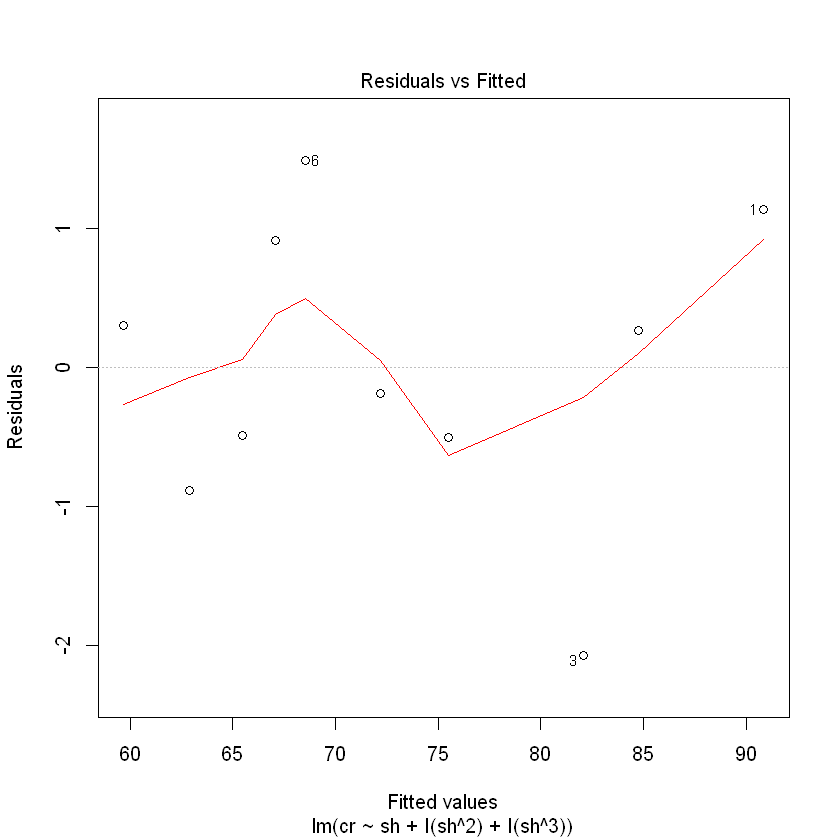

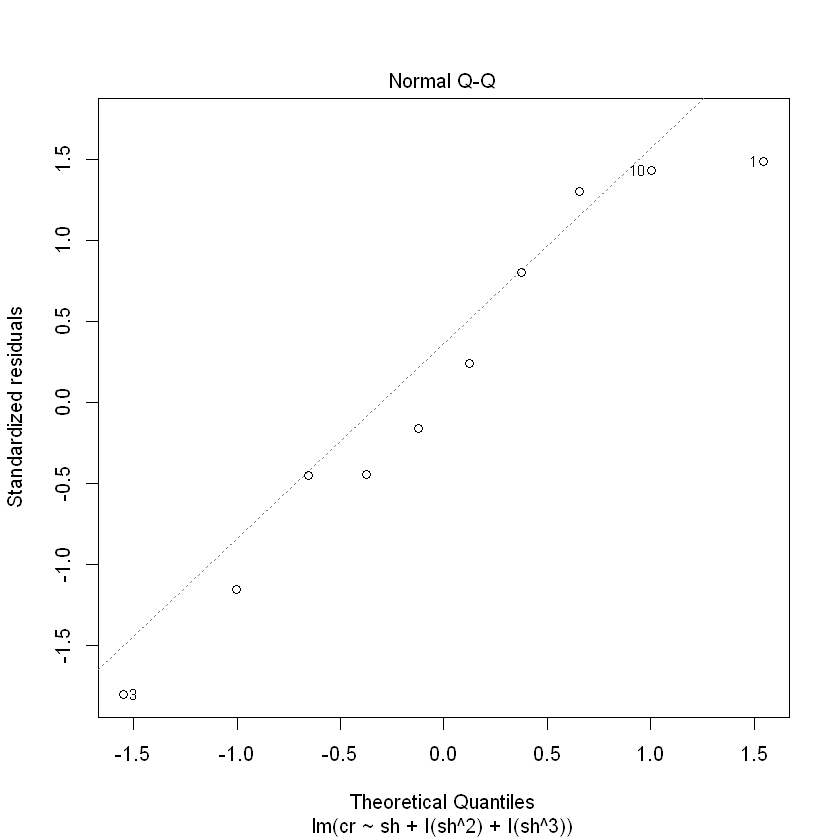

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

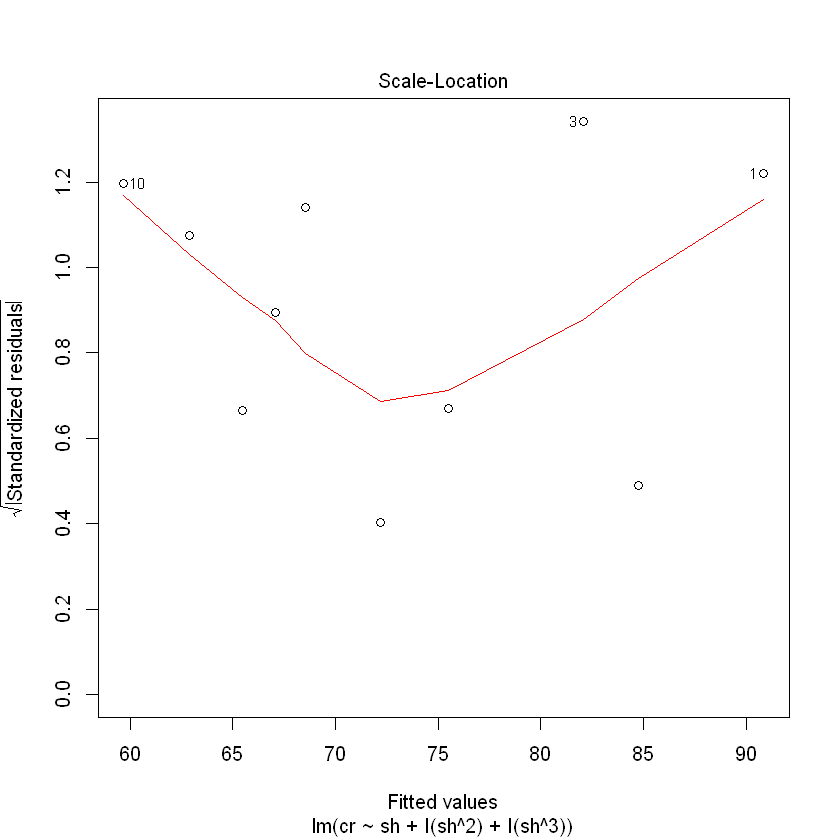

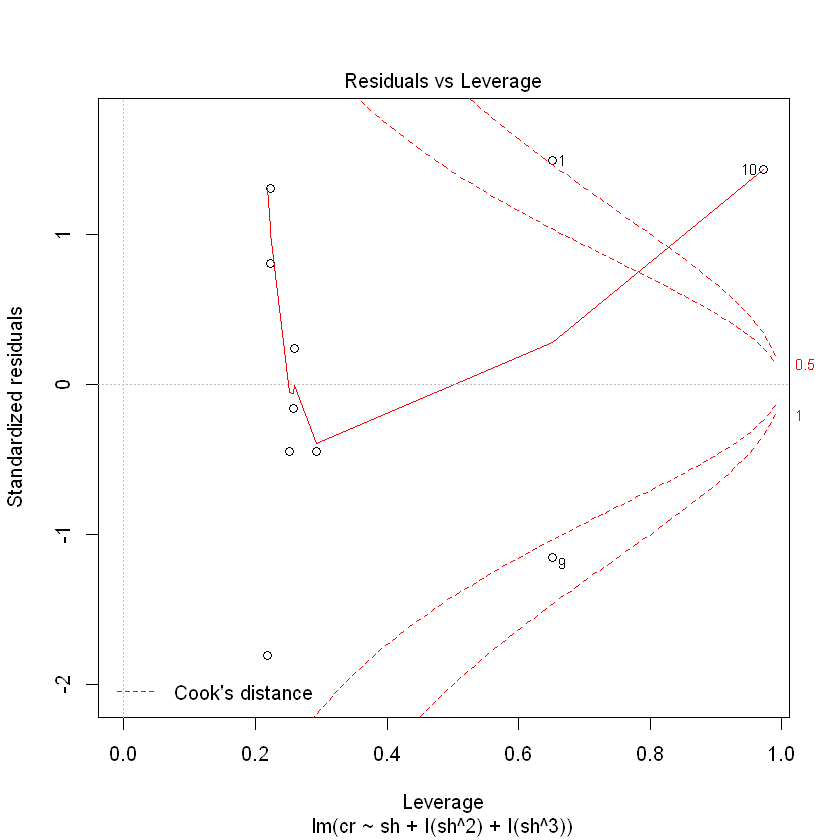

In [28]:
plot(poly_mod)

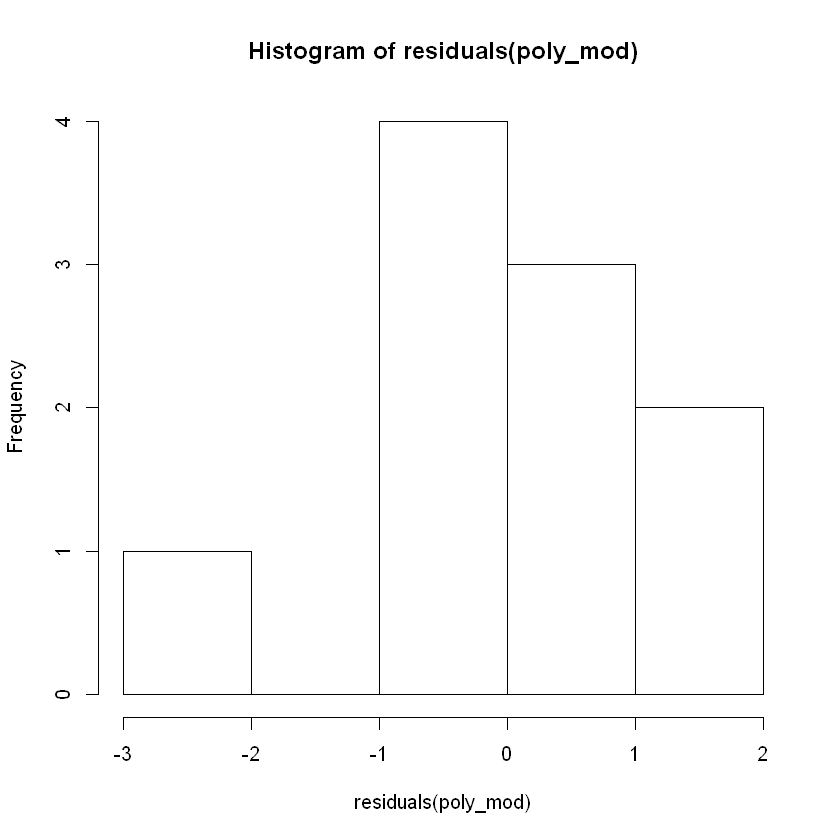

In [29]:
hist(residuals(poly_mod)) # close to normal distribution